# Imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read Dataset

In [2]:
df=pd.read_csv("billboard_hot_100.csv")
df.shape
df.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [69]:
df.tail()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1
330086,1958-08-04,100,Judy,Frankie Vaughan,NaN,100,1


In [70]:
df.isnull().sum()

date                  0
rank                  0
song                  0
artist                0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64

In [86]:
# Get count of unique artists
print("number of unique artists: \t", df['artist'].nunique())
print("number of unique songs: \t", df['song'].nunique())

number of unique artists: 	 10205
number of unique songs: 	 24620


In [72]:
# Get top 10 artists
df['artist'].value_counts().head(10)

Taylor Swift     1023
Elton John        889
Madonna           857
Drake             787
Kenny Chesney     769
Tim McGraw        731
Keith Urban       673
Stevie Wonder     659
Rod Stewart       657
Mariah Carey      621
Name: artist, dtype: int64

In [87]:
pd.DataFrame(df[df['rank']==1]['artist'].value_counts().head(15))

,artist
Mariah Carey,65
The Beatles,54
Boyz II Men,34
Madonna,32
Drake,31
Whitney Houston,31
Michael Jackson,30
The Black Eyed Peas,28
Bee Gees,27
Adele,26


# The Ye Analysis 

<img src="https://c8p9p3e5.rocketcdn.me/wp-content/uploads/2022/02/kanye-west-staring-meme.jpg" width="300" height="300" />

In [88]:
kanye_west_df = df[df['artist'] == 'Kanye West']


In [89]:
kanye_west_df.head(10) 

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
54,2021-11-06,55,Hurricane,Kanye West,58.0,6,9
79,2021-11-06,80,Praise God,Kanye West,89.0,20,5
157,2021-10-30,58,Hurricane,Kanye West,50.0,6,8
188,2021-10-30,89,Praise God,Kanye West,99.0,20,4
249,2021-10-23,50,Hurricane,Kanye West,44.0,6,7
298,2021-10-23,99,Praise God,Kanye West,NaN,20,3
343,2021-10-16,44,Hurricane,Kanye West,34.0,6,6
433,2021-10-09,34,Hurricane,Kanye West,31.0,6,5
499,2021-10-09,100,Moon,Kanye West,76.0,17,5
530,2021-10-02,31,Hurricane,Kanye West,26.0,6,4


In [73]:
# Get Kanye West's top 10 songs by weeks on the board
kanye_west_df.sort_values(by='weeks-on-board', ascending=False).head(10)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
64750,2009-06-13,51,Heartless,Kanye West,48.0,2,30
64847,2009-06-06,48,Heartless,Kanye West,35.0,2,29
64934,2009-05-30,35,Heartless,Kanye West,45.0,2,28
65044,2009-05-23,45,Heartless,Kanye West,33.0,2,27
71745,2008-02-09,46,Stronger,Kanye West,38.0,1,27
65132,2009-05-16,33,Heartless,Kanye West,33.0,2,26
71837,2008-02-02,38,Stronger,Kanye West,34.0,1,26
88949,2004-10-23,50,Jesus Walks,Kanye West,47.0,11,25
65232,2009-05-09,33,Heartless,Kanye West,32.0,2,25
54046,2011-07-02,47,All Of The Lights,Kanye West,38.0,18,25


In [74]:
kanye_west_df.sort_values('rank')

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
73600,2007-09-29,1,Stronger,Kanye West,2.0,1,8
73301,2007-10-20,2,Stronger,Kanye West,2.0,1,11
73401,2007-10-13,2,Stronger,Kanye West,2.0,1,10
73501,2007-10-06,2,Stronger,Kanye West,1.0,1,9
66301,2009-02-21,2,Heartless,Kanye West,3.0,2,14
...,...,...,...,...,...,...,...
798,2021-09-18,99,Remote Control,Kanye West,40.0,40,2
27599,2016-07-30,100,Father Stretch My Hands Pt. 1,Kanye West,NaN,37,11
57899,2010-10-09,100,POWER,Kanye West,67.0,22,13
499,2021-10-09,100,Moon,Kanye West,76.0,17,5


In [91]:
# Rank 1 ye song for the longest
df[(df['artist']=='Kanye West') & (df['rank']==1)]['song'].value_counts()

Stronger    1
Name: song, dtype: int64

<AxesSubplot:xlabel='song', ylabel='count'>

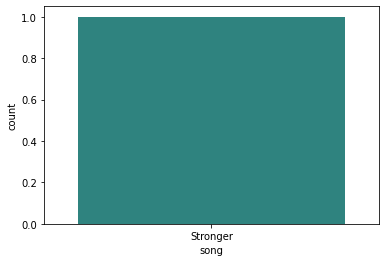

In [93]:
sns.countplot(x= df[(df['artist']=='Kanye West') & (df['rank']==1)]['song'],data=df, palette='viridis')

In [15]:
df[(df['artist']=='Kanye West') & (df['rank'] <= 5)]['song'].value_counts()

Heartless        11
Stronger          9
Love Lockdown     2
Name: song, dtype: int64

<AxesSubplot:xlabel='song', ylabel='count'>

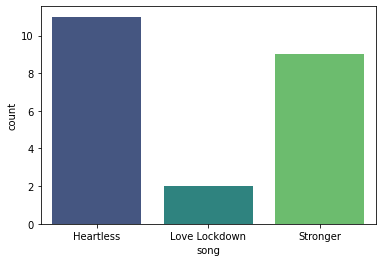

In [16]:
sns.countplot(x= df[(df['artist']=='Kanye West') & (df['rank'] <= 5)]['song'],data=df, palette='viridis')

In [95]:
kanye_west_df[['song','weeks-on-board']].groupby('song').max().sort_values(by=['weeks-on-board'], inplace=False, ascending=False).head(10)


,weeks-on-board
song,
Heartless,30
Stronger,27
Jesus Walks,25
All Of The Lights,25
Father Stretch My Hands Pt. 1,23
Love Lockdown,23
Through The Wire,21
Can't Tell Me Nothing,19
Diamonds From Sierra Leone,19


# The Champagne Papi Analysis 

<img src="https://distracttv.com/wp-content/uploads/2015/12/drake-hotline-bling-funny-meme.jpg">

In [3]:
drake_df = df[df['artist'] == 'Drake']

In [4]:
drake_df.head(10)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
90,2021-11-06,91,No Friends In The Industry,Drake,87.0,11,8
186,2021-10-30,87,No Friends In The Industry,Drake,74.0,11,7
189,2021-10-30,90,Champagne Poetry,Drake,77.0,4,7
273,2021-10-23,74,No Friends In The Industry,Drake,64.0,11,6
276,2021-10-23,77,Champagne Poetry,Drake,65.0,4,6
363,2021-10-16,64,No Friends In The Industry,Drake,60.0,11,5
364,2021-10-16,65,Champagne Poetry,Drake,54.0,4,5
397,2021-10-16,98,TSU,Drake,84.0,9,5
453,2021-10-09,54,Champagne Poetry,Drake,30.0,4,4
459,2021-10-09,60,No Friends In The Industry,Drake,40.0,11,4


In [5]:
drake_df.sort_values(by='weeks-on-board', ascending=False).head(10)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
28949,2016-04-23,50,Hotline Bling,Drake,38.0,2,36
16144,2018-10-06,45,God's Plan,Drake,40.0,1,36
29037,2016-04-16,38,Hotline Bling,Drake,34.0,2,35
16239,2018-09-29,40,God's Plan,Drake,36.0,1,35
29133,2016-04-09,34,Hotline Bling,Drake,28.0,2,34
16335,2018-09-22,36,God's Plan,Drake,37.0,1,34
29227,2016-04-02,28,Hotline Bling,Drake,27.0,2,33
16436,2018-09-15,37,God's Plan,Drake,30.0,1,33
16529,2018-09-08,30,God's Plan,Drake,27.0,1,32
29326,2016-03-26,27,Hotline Bling,Drake,24.0,2,32


In [6]:
drake_df.sort_values('rank')

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
19200,2018-03-03,1,God's Plan,Drake,1.0,1,5
17800,2018-06-09,1,Nice For What,Drake,1.0,1,8
19300,2018-02-24,1,God's Plan,Drake,1.0,1,4
19100,2018-03-10,1,God's Plan,Drake,1.0,1,6
19400,2018-02-17,1,God's Plan,Drake,1.0,1,3
...,...,...,...,...,...,...,...
17099,2018-08-04,100,Can't Take A Joke,Drake,61.0,18,4
17299,2018-07-21,100,Is There More,Drake,36.0,36,2
22099,2017-08-19,100,Signs,Drake,98.0,36,6
34799,2015-03-14,100,No Tellin',Drake,81.0,81,2


In [8]:
df[(df['artist']=='Drake') & (df['rank']==1)]['song'].value_counts()

God's Plan        11
In My Feelings    10
Nice For What      8
What's Next        1
Toosie Slide       1
Name: song, dtype: int64

In [17]:
df[(df['artist']=='Drake') & (df['rank'] <= 5)]['song'].value_counts()

God's Plan          22
Hotline Bling       16
Nice For What       14
In My Feelings      12
Best I Ever Had      8
Toosie Slide         6
What's Next          2
Champagne Poetry     1
Nonstop              1
Find Your Love       1
Name: song, dtype: int64

<AxesSubplot:xlabel='song', ylabel='count'>

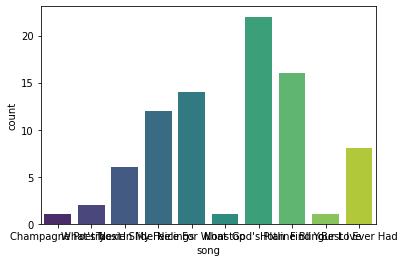

In [18]:
sns.countplot(x= df[(df['artist']=='Drake') & (df['rank'] <= 5)]['song'],data=df, palette='viridis')

<AxesSubplot:xlabel='song', ylabel='count'>

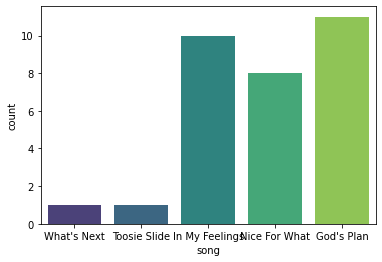

In [9]:
sns.countplot(x= df[(df['artist']=='Drake') & (df['rank']==1)]['song'],data=df, palette='viridis')

In [11]:
drake_df[['song','weeks-on-board']].groupby('song').max().sort_values(by=['weeks-on-board'], inplace=False, ascending=False).head(10)

,weeks-on-board
song,
Hotline Bling,36
God's Plan,36
Controlla,26
Headlines,25
Nice For What,25
Fake Love,25
Best I Ever Had,24
In My Feelings,22
Started From The Bottom,22
